# Chapter 9: ANOVA
- ANOVA
- MANOVA

### One-way ANOVA

In [12]:
import numpy as np
import pandas as pd
from scipy import stats

# Data for the three groups
group1 = [80, 85, 88, 92, 86]  # Traditional
group2 = [78, 82, 84, 79, 80]  # Online Videos
group3 = [90, 92, 95, 94, 93]  # Interactive

# Perform One-Way ANOVA
f_statistic, p_value = stats.f_oneway(group1, group2, group3)

print("F-Statistic:", f_statistic)
print("P-value:", p_value)

F-Statistic: 19.491289198606268
P-value: 0.00017004219477744243


In [13]:
[np.mean(group1), np.mean(group2), np.mean(group3)]

[np.float64(86.2), np.float64(80.6), np.float64(92.8)]

In [14]:
5*(86.2 - 86.53)**2 + 5*(80.6 - 86.53)**2 + 5*(92.8 - 86.53)**2

372.93350000000015

In [15]:
372.93 + 114.8

487.73

In [16]:
grp1 = pd.DataFrame({'group':'tranditional','score':group1})
grp2 = pd.DataFrame({'group':'online','score':group2})
grp3 = pd.DataFrame({'group':'interactive','score':group3})
grp1.head()

,group,score
0,tranditional,80
1,tranditional,85
2,tranditional,88
3,tranditional,92
4,tranditional,86


In [17]:
forplot = pd.concat([grp1,grp2,grp3])
forplot

,group,score
0,tranditional,80
1,tranditional,85
2,tranditional,88
3,tranditional,92
4,tranditional,86
0,online,78
1,online,82
2,online,84
3,online,79
4,online,80


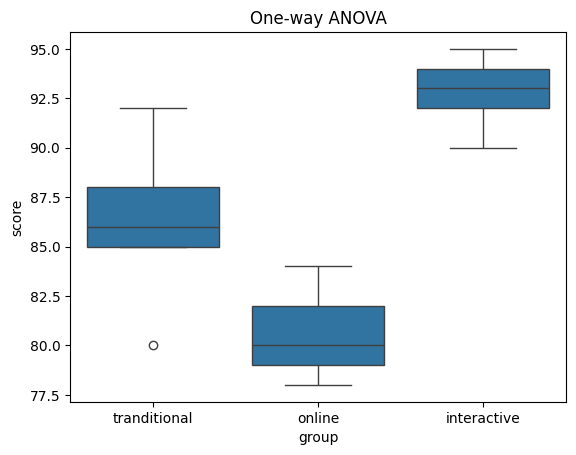

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x='group', y='score', data=forplot)
plt.title('One-way ANOVA')
plt.show()

Text(0, 0.5, 'Score')

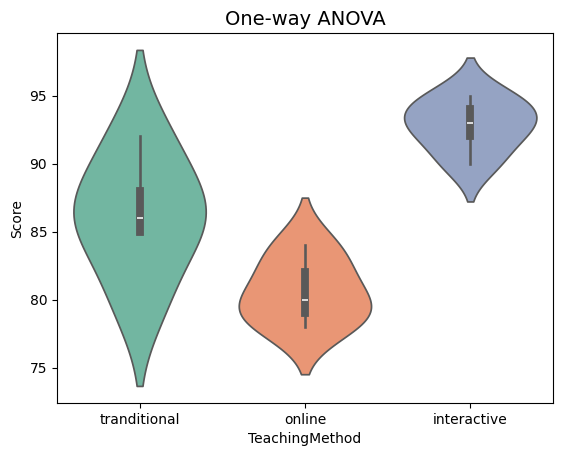

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Use a more vibrant and distinct color palette
sns.violinplot(x='group', y='score', data=forplot, hue='group', palette="Set2")

plt.title('One-way ANOVA', fontsize=14)
plt.xlabel('TeachingMethod')
plt.ylabel('Score')

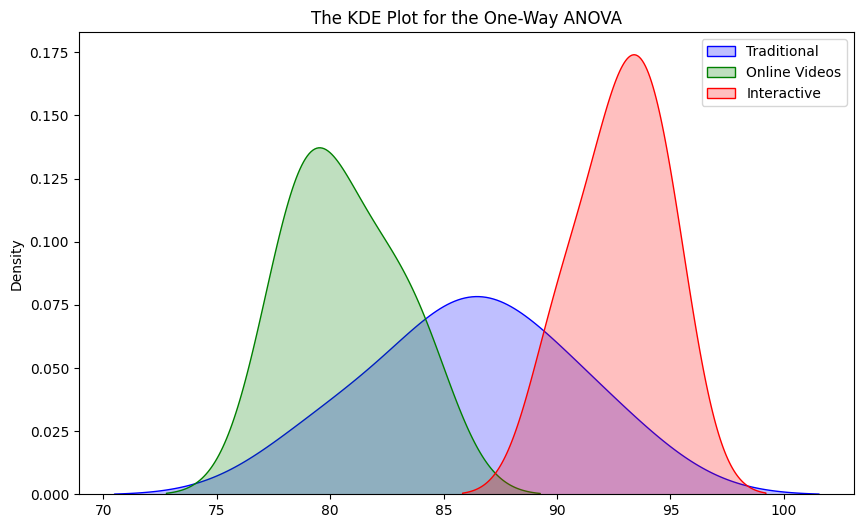

In [23]:
# Plotting the distributions
plt.figure(figsize=(10, 6))
sns.kdeplot(group1, color='blue', label='Traditional', fill=True)
sns.kdeplot(group2, color='green', label='Online Videos', fill=True)
sns.kdeplot(group3, color='red', label='Interactive', fill=True)
plt.title('The KDE Plot for the One-Way ANOVA')
plt.legend()  # Add this line to display the legend

### Two-way ANOVA

In [24]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
import matplotlib.pyplot as plt

# Set random seed
np.random.seed(42)

# Define levels
teaching_methods = ['Method 1', 'Method 2', 'Method 3']
study_times = ['Low', 'High']
n_per_group = 10

# Simulate data
data = []

for method in teaching_methods:
    for study in study_times:
        if method == 'Method 1':
            base_score = 70
        elif method == 'Method 2':
            base_score = 75
        else:
            base_score = 80

        if study == 'High':
            base_score += 5  # Add boost for high study time

        scores = np.random.normal(loc=base_score, scale=5, size=n_per_group)

        for score in scores:
            data.append({
                'TeachingMethod': method,
                'StudyTime': study,
                'Score': score
            })

# Create DataFrame
df = pd.DataFrame(data)
df.head()

,TeachingMethod,StudyTime,Score
0,Method 1,Low,72.483571
1,Method 1,Low,69.308678
2,Method 1,Low,73.238443
3,Method 1,Low,77.615149
4,Method 1,Low,68.829233


In [25]:
# Two-way ANOVA
model = ols('Score ~ C(TeachingMethod) * C(StudyTime)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                                     sum_sq    df          F        PR(>F)
C(TeachingMethod)               1159.130250   2.0  31.785575  7.525074e-10
C(StudyTime)                     188.200832   1.0  10.321656  2.218336e-03
C(TeachingMethod):C(StudyTime)   186.464251   2.0   5.113208  9.254695e-03
Residual                         984.613819  54.0        NaN           NaN


<Axes: xlabel='TeachingMethod', ylabel='Score'>

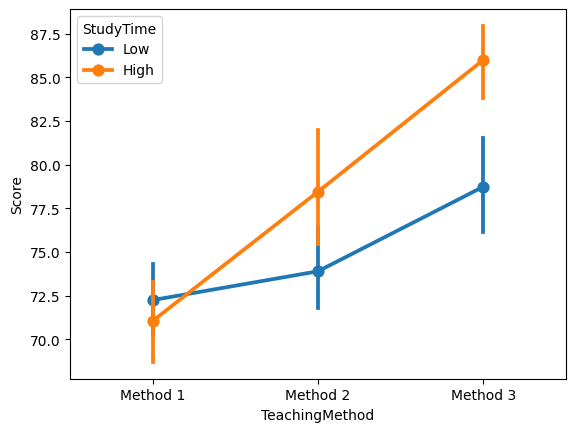

In [26]:
# Create interaction plot using seaborn
sns.pointplot(x='TeachingMethod', y='Score', hue='StudyTime', data=df)

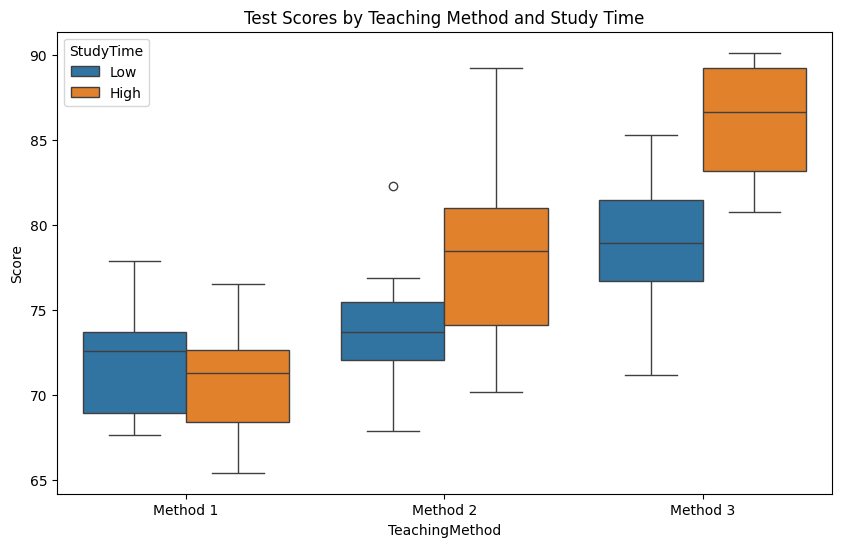

In [27]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='TeachingMethod', y='Score', hue='StudyTime', data=df)
plt.title('Test Scores by Teaching Method and Study Time')
plt.show()

### MANOVA

In [1]:
import pandas as pd
import numpy as np
np.random.seed(42)
teaching_methods = ['Method 1', 'Method 2', 'Method 3']
study_times = ['Low', 'High']
n_per_group = 10 # 10 students per group
  # We simulate scores for 10 students in each group.
  # Loops over the 6 combinations (3 × 2 = 6)
data = []
for method in teaching_methods:
    for study in study_times:
        # Assigns a baseline math score for each teaching method
        if method == 'Method 1':
            math_base = 70
            science_base = 65
        elif method == 'Method 2':
            math_base = 75
            science_base = 70
        else:
            math_base = 80
            science_base = 75

        # Adjust for high study time
        if study == 'High':
            math_base += 5 
            science_base += 5

        # Simulate from a normal distribution
        math_scores = np.random.normal(loc=math_base, scale=5, size=n_per_group)
        science_scores = np.random.normal(loc=science_base, scale=6, size=n_per_group) 

        for m_score, s_score in zip(math_scores, science_scores):
            data.append({
                'TeachingMethod': method,
                'StudyTime': study,
                'MathScore': m_score,
                'ScienceScore': s_score
            })

df = pd.DataFrame(data) 
summary_table = df.groupby(['TeachingMethod', 'StudyTime'])[['MathScore', 'ScienceScore']].mean().round(2)
summary_table.reset_index()


,TeachingMethod,StudyTime,MathScore,ScienceScore
0,Method 1,High,73.89,68.14
1,Method 1,Low,72.24,60.26
2,Method 2,High,79.92,74.71
3,Method 2,Low,73.74,71.20
4,Method 3,High,84.75,80.83
5,Method 3,Low,80.51,74.10


In [2]:
from statsmodels.multivariate.manova import MANOVA
manova = MANOVA.from_formula('MathScore + ScienceScore ~ TeachingMethod + StudyTime + TeachingMethod:StudyTime', data=df)
result= manova.mv_test()
print(result)

                   Multivariate linear model
                                                               
---------------------------------------------------------------
       Intercept         Value  Num DF  Den DF  F Value  Pr > F
---------------------------------------------------------------
          Wilks' lambda  0.0105 2.0000 53.0000 2486.7881 0.0000
         Pillai's trace  0.9895 2.0000 53.0000 2486.7881 0.0000
 Hotelling-Lawley trace 93.8411 2.0000 53.0000 2486.7881 0.0000
    Roy's greatest root 93.8411 2.0000 53.0000 2486.7881 0.0000
---------------------------------------------------------------
                                                               
---------------------------------------------------------------
       TeachingMethod     Value  Num DF  Den DF  F Value Pr > F
---------------------------------------------------------------
            Wilks' lambda 0.4544 4.0000 106.0000 12.8131 0.0000
           Pillai's trace 0.5458 4.0000 108.0000 10.1350 0.

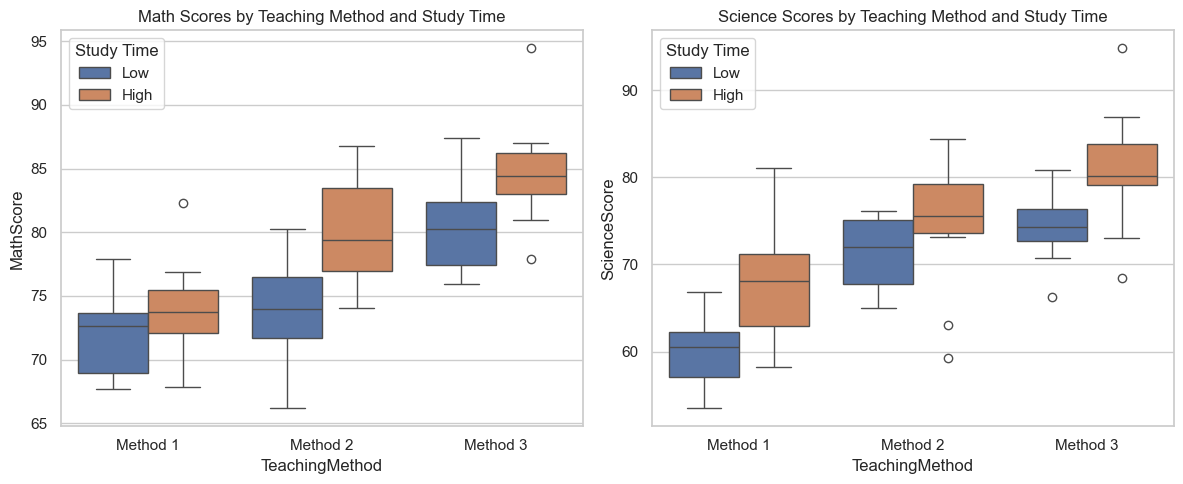

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")   # For better aesthetics
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x='TeachingMethod', y='MathScore', hue='StudyTime', data=df)
plt.title('Math Scores by Teaching Method and Study Time')
plt.legend(title='Study Time')
plt.subplot(1, 2, 2)
sns.boxplot(x='TeachingMethod', y='ScienceScore', hue='StudyTime', data=df)
plt.title('Science Scores by Teaching Method and Study Time')
plt.legend(title='Study Time')
plt.tight_layout()
plt.show()

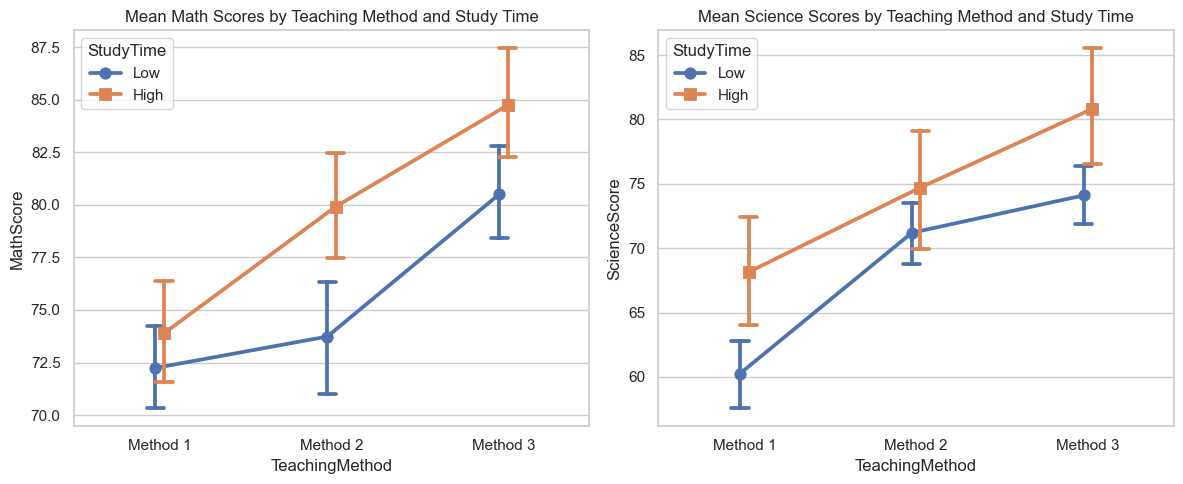

In [4]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.pointplot(x='TeachingMethod', y='MathScore', hue='StudyTime', data=df, dodge=True, markers=['o', 's'], capsize=0.1)
plt.title('Mean Math Scores by Teaching Method and Study Time')
plt.subplot(1, 2, 2)
sns.pointplot(x='TeachingMethod', y='ScienceScore', hue='StudyTime', data=df, dodge=True, markers=['o', 's'], capsize=0.1)
plt.title('Mean Science Scores by Teaching Method and Study Time')
plt.tight_layout()
plt.show()